# Cythosim::Frame example
Requires Python>=3.7  
Before running, copy or move the cytosim module (cytosim.---.so) to the current folder.

### Frame is a dictionnary of lists of cytosim objects
Here we showcase how to use Frame to order objects before plotting or analyzing them.

In [1]:
import cytosim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_fibers(fibers, color="green"):
    for f in fibers:
        p = f.points()
        plt.plot(p[:,0],p[:,1],color=color)
    plt.axis('equal')
    
def scatter_couples(couples,color="blue"):
    pos = np.array([c.position() for c in couples])
    plt.scatter(pos[:,0],pos[:,1],color=color)
    plt.axis('equal')

### Bundle simulation
We use the "bipolar.cym" config file in which there are two kinds of couples : "kinesin5" and "motor". Here we want to process them differently.

In [3]:
sim = cytosim.start("cym/bipolar.cym")

In [4]:
while sim.time()<0.1:
    sim.once()

### Making a frame to sort cytosim objects

In [5]:
frame = sim.frame()
frame.keys()

dict_keys(['microtubule', 'core', 'cell', 'centrosome', 'chromosome', 'kinesin5', 'motor'])

### Processing differently different kinds of couples
Here we plot kinesin5 in blue and motors in red.

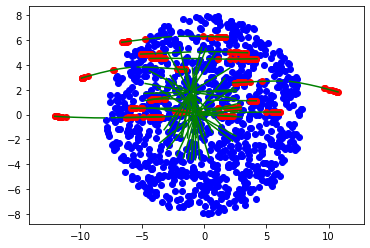

In [6]:
plt.figure()
scatter_couples(frame["kinesin5"])
scatter_couples(frame["motor"],color="red")
plot_fibers(frame["microtubule"])
plt.show()

### Updating a frame
A frame is just a collection of pointer to cytosim objects. If you remove or add objects, you should update the frame. Unless you want cythosim to crash ?

Here we show this by joining iteratively the 10 first microtubules into a single long microtubule.

In [7]:
nmts = len(frame["microtubule"])
print(f"Number of MT : {nmts}")

Number of MT : 68


In [8]:
for i in range(10):
    frame["microtubule"][0].join(frame["microtubule"][1])
    frame = frame.update() # If you comment this, cythosim simulation will crash !
nmts = len(frame["microtubule"])
print(f"Number of MT : {nmts}")

Number of MT : 58


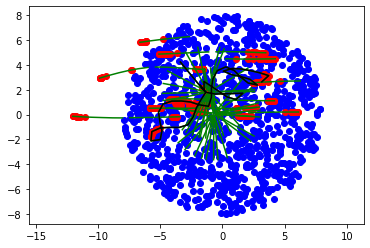

In [9]:
plt.figure()
scatter_couples(frame["kinesin5"])
scatter_couples(frame["motor"],color="red")
plot_fibers(frame["microtubule"])
plot_fibers([frame["microtubule"][0]],color="black")
plt.show()